# Polygon validation

Making the polygons be non-self-intersecting is critical. There are routines in GEOS (and exposed in teqpflsh) to break up self-intersecting polygons into non-self-intersecting polygons

In [1]:
import numpy as np
import teqpflsh
import matplotlib.pyplot as plt
teqpflsh.__version__

'0.0.4'

False

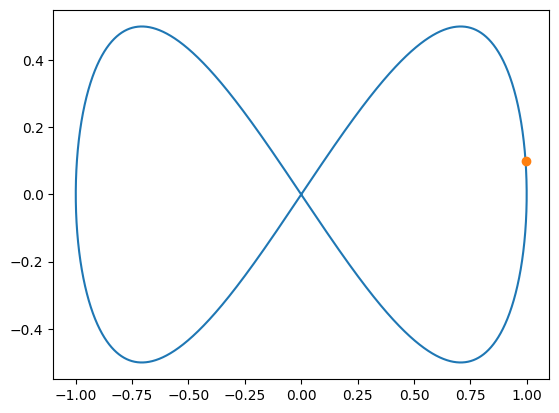

In [2]:
ptr = teqpflsh.GeometryFactoryHolder()

# A bowtie curve that is periodic and self-intersecting
t = np.linspace(0+0.1, 2*np.pi+0.1, 10000)
X,Y = np.cos(t), np.cos(t)*np.sin(t)
poly1 = ptr.makeclosedpolygon(X, Y)
plt.plot(X, Y)
plt.plot(X[0], Y[0], 'o')
poly1.isValid # False since self-intersecting

The reason this matters in this context is that we need to be able to sample the domain randomly to generate guess values.

In [3]:
# This doesn't work because the triangulation fails because the geometry is not valid
N = 10000
x = np.zeros((N, ))
y = np.zeros((N, ))
teqpflsh.sample_random(poly1, 10000, x, y)

RuntimeError: IllegalStateException: Unable to find a convex corner

Now we need to break up the polygon into portions that are simple (non self-intersecting) with the MakeValid class of geos : https://libgeos.org/doxygen/classgeos_1_1operation_1_1valid_1_1MakeValid.html

N: 2
simple: True
valid: True
N: 1
simple: True
valid: True
N: 1
simple: True
valid: True


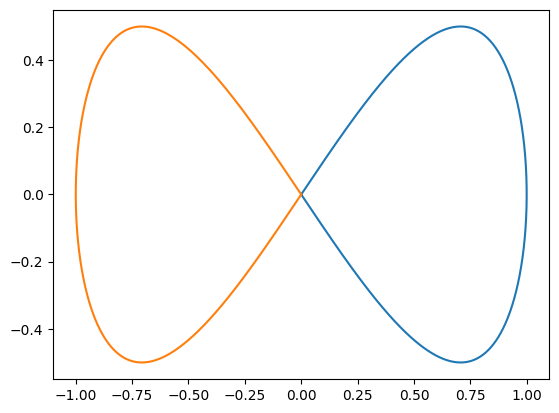

In [4]:
simpl = poly1.make_valid()
print(f'N: {simpl.getNumGeometries()}')
print(f'simple: {simpl.isSimple}')
print(f'valid: {simpl.isValid}')
for i in range(simpl.getNumGeometries()):
    pI = simpl.getGeometryN(i)
    plt.plot(*pI.getXY())
    print(f'N: {pI.getNumGeometries()}')
    print(f'simple: {pI.isSimple}')
    print(f'valid: {pI.isValid}')

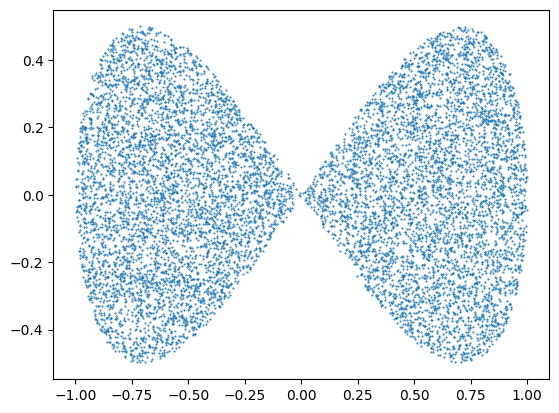

In [5]:
# And now sampling works after forcing validity
N = 10000
x = np.zeros((N, ))
y = np.zeros((N, ))
teqpflsh.sample_random(simpl, 10000, x, y)
plt.plot(x, y, '.', ms=1);